In [1]:
## Data Cleaning and Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Data Loading

In [4]:
data=pd.read_excel("E:/Data Analytics Projects/Grocery Bill Analysis/data/processed_data.xlsx")
print(data.shape)
data.head()

(555, 16)


,Date Key,Store Key,Store Name,Store Type,Product Key,Product Name,Product Department,Transaction #,Dollar Sales,Units Sold,Customer ID,Age,Income,Veg or Non-Veg,Offer,Purchased
0,2022-02-01,2,Costco,Retail,P125,Beer,Alcohol,1389,25.54,2,CID404,< 30,> = 20k,Veg,No,Yes
1,2022-02-01,2,Costco,Retail,P117,Blueberries,Produce,1972,32.43,5,CID404,< 30,> = 20k,Veg,No,Yes
2,2022-02-01,2,Costco,Retail,P109,Bread,Bakery,4269,29.11,3,CID404,< 30,> = 20k,Veg,No,Yes
3,2022-02-01,2,Costco,Retail,P114,Carrots,Produce,2033,39.98,7,CID404,< 30,> = 20k,Veg,No,Yes
4,2022-02-01,2,Costco,Retail,P114,Carrots,Produce,4583,27.83,8,CID403,< 30,< 20k,Veg,No,Yes


In [5]:
### Data Analysis 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date Key            555 non-null    datetime64[ns]
 1   Store Key           555 non-null    int64         
 2   Store Name          555 non-null    object        
 3   Store Type          555 non-null    object        
 4   Product Key         555 non-null    object        
 5   Product Name        555 non-null    object        
 6   Product Department  555 non-null    object        
 7   Transaction #       555 non-null    int64         
 8   Dollar Sales        555 non-null    float64       
 9   Units Sold          555 non-null    int64         
 10  Customer ID         555 non-null    object        
 11  Age                 555 non-null    object        
 12  Income              555 non-null    object        
 13  Veg or Non-Veg      555 non-null    object        

In [7]:
data.describe()

,Store Key,Transaction #,Dollar Sales,Units Sold
count,555.000000,555.000000,555.000000,555.000000
mean,2.082883,5163.181982,22.547658,4.735135
std,0.762605,3063.038257,15.602946,3.282726
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2654.500000,8.220000,2.000000
50%,2.000000,5205.000000,22.390000,4.000000
75%,3.000000,8103.000000,37.105000,7.000000
max,3.000000,9987.000000,49.950000,21.000000


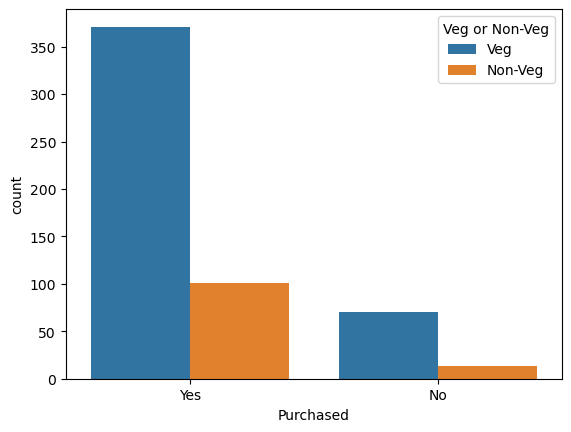

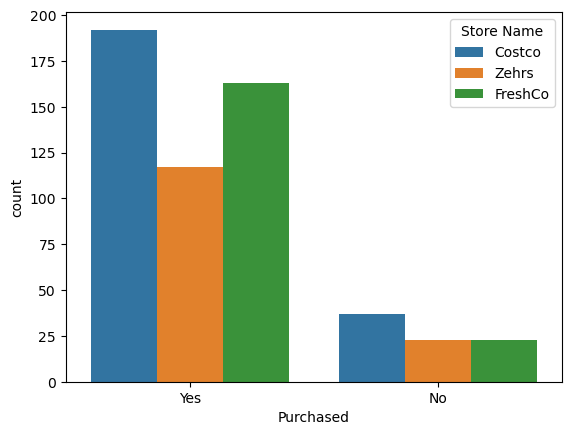

In [8]:
#Exploratory Analysis of Purchase Behavior Across Product Categories and Stores

sns.countplot(x="Purchased", hue='Veg or Non-Veg', data=data)
plt.show()
sns.countplot(x="Purchased",hue="Store Name",data=data)
plt.show()

In [10]:
# Time-Based Trends

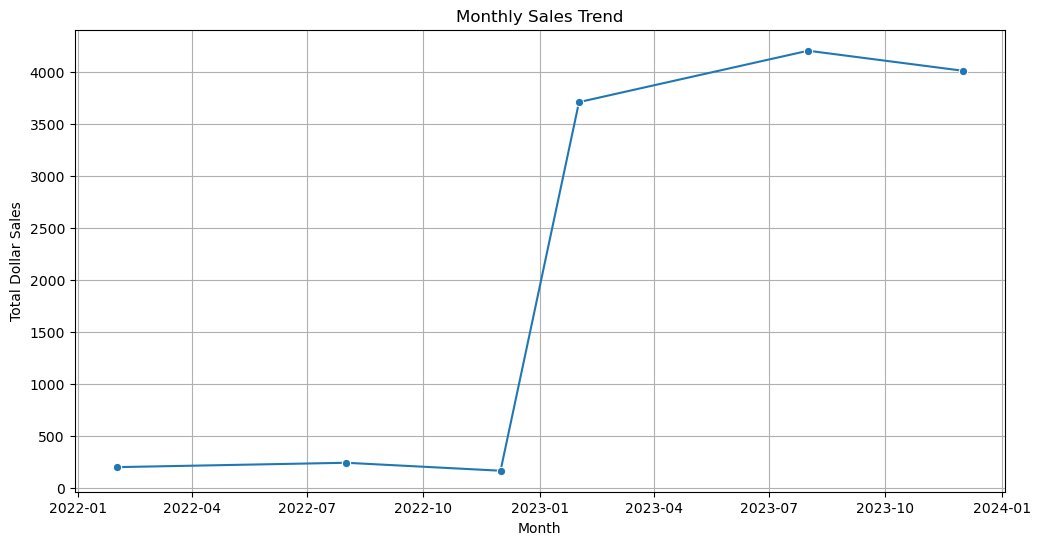

In [13]:
# Group by year and month
monthly_sales = data.groupby(data['Date Key'].dt.to_period("M"))['Dollar Sales'].sum().reset_index()
monthly_sales['Date Key'] = monthly_sales['Date Key'].dt.to_timestamp()

# Plot monthly sales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date Key', y='Dollar Sales', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Dollar Sales")
plt.grid()
plt.show()


In [14]:
# Weekly Sales Distribution

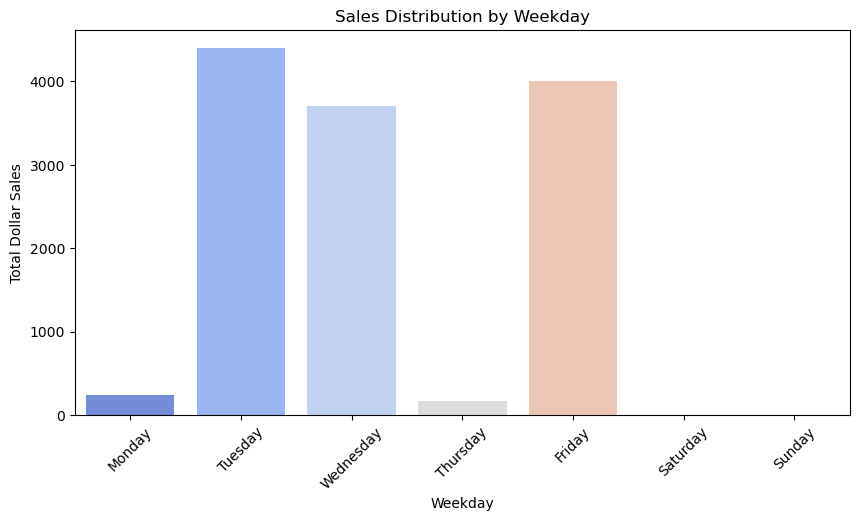

In [21]:
# Group by weekday
weekday_sales = data.groupby('Weekday')['Dollar Sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot weekday sales
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")
plt.title("Sales Distribution by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Dollar Sales")
plt.xticks(rotation=45)
plt.show()
